In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf 
import keras 
from keras import layers 
import cv2 as cv
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from tqdm import tqdm
import re 
from tensorflow.keras.preprocessing.image import img_to_array

## sort alphabitcly

In [3]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

directory ="/kaggle/input/face-mask-lite-dataset/without_mask"
files = sorted_alphanumeric(os.listdir(directory))

## load images

In [4]:
SIZE_=128

In [5]:

images=[]

for i in tqdm(files):
    if i== "seed9900.png":
        break
    else:
        image=cv.imread(directory+"/"+i,1)
        image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
        image=cv.resize(image,(SIZE_,SIZE_))
        image=(image-127.5)/127.5
        img=image.astype(float)
        images.append(img_to_array(img))
    

 99%|█████████▉| 9900/10000 [09:26<00:05, 17.49it/s]


In [6]:
np.array(images).shape

(9900, 128, 128, 3)

## plot function

In [7]:
  
def plot_images(imagetoshow,sqr=5) :   
    plt.figure(figsize=(10,10))
    for i in range (sqr**2):
            plt.subplot(sqr,sqr,i+1)
            plt.axis("off")
            plt.imshow(imagetoshow[i])

    plt.show()


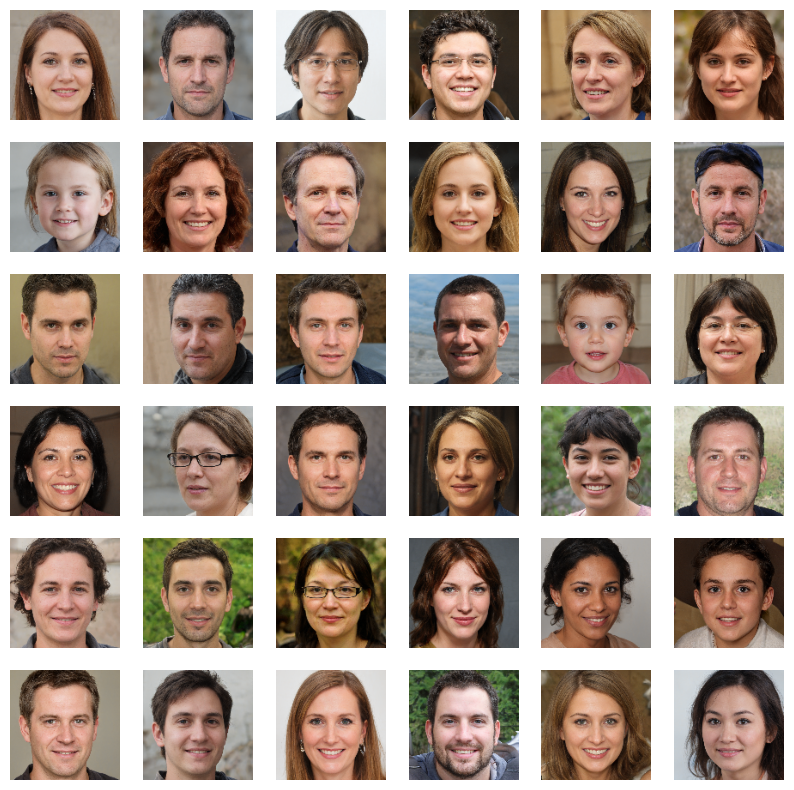

In [8]:
plot_images(images,6)


## batch size

In [9]:
batch_size=32
dataset=tf.data.Dataset.from_tensor_slices(np.array(images)).batch(batch_size)

In [10]:
next(dataset.as_numpy_iterator()).shape

(32, 128, 128, 3)

## Genrator

In [11]:
laten_dim =100
def genrator():
    model =tf.keras.Sequential()
    model.add(layers.Dense(SIZE_*SIZE_*3,use_bias=False,input_shape=(laten_dim,)))
    model.add(layers.Reshape((SIZE_,SIZE_,3)))
    model.add(tf.keras.layers.Conv2D(128,4,strides=1,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.Conv2D(128,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4,strides=1,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.Conv2D(256,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(512,4,strides=1,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.Conv2D(512,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(512,4,strides=1,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(512,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(256,4,strides=1,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(256,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(128,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(128,4,strides=1,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(3,4,strides=1,padding="same",kernel_initializer="he_normal",use_bias=False))

    return model

In [12]:
Genrator=genrator()
Genrator.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 49152)          │     4,915,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 128)  │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │       262,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │     1,048,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 32, 32, 512)    │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 512)    │     4,194,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 512)    │     4,194,304 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 512)    │     4,194,304 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 256)    │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 256)    │     1,048,576 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 25,381,888 (96.82 MB)

 Trainable params: 25,378,304 (96.81 MB)

 Non-trainable params: 3,584 (14.00 KB)

## Descriminator 

In [13]:
def descriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input((SIZE_,SIZE_,3)))
    model.add(tf.keras.layers.Conv2D(128,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(128,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(512,4,strides=2,padding="same",kernel_initializer="he_normal",use_bias=False))
   
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Flatten())
    model.add(layers.Dense(units=1,activation="sigmoid"))
    return model
    

In [14]:
Descriminator=descriminator()
Descriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │       262,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 256)      │     1,048,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,097,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949,569 (15.07 MB)

 Trainable params: 3,948,033 (15.06 MB)

 Non-trainable params: 1,536 (6.00 KB)

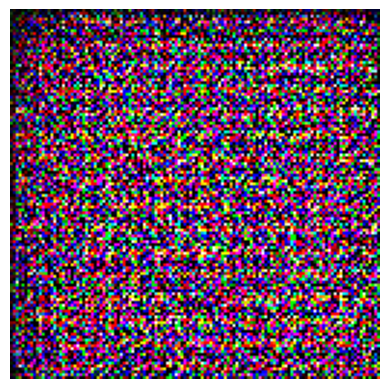

In [15]:
noise=np.random.normal(-1,1,size=(1,100))
img=Genrator(noise)
plt.imshow(img[0,:,:,:])
plt.axis("off")
plt.show()

In [16]:
optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    clipvalue=1.0,
    decay=1e-8
)
optimizer2=tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    clipvalue=1.0,
    decay=1e-8
)

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [17]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [18]:
def generatorloss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)
def descriminatorloss(fake_output,real_output):
    fake=cross_entropy(tf.zeros_like(fake_output),fake_output)
    real=cross_entropy(tf.ones_like(real_output),real_output)
    return fake+real
    

In [23]:
def train_step(real_data):
    with tf.GradientTape() as des_tap,tf.GradientTape() as gen_tap:
        noise =np.random.normal(0,1,(batch_size,laten_dim))
        fake_images=Genrator(noise)
        fake_output=Descriminator(fake_images)
        real_output=Descriminator(real_data)
        gen_loss=generatorloss(fake_output)
        des_loss=descriminatorloss(fake_output,real_output)
    generator_gradient=gen_tap.gradient(gen_loss,Genrator.trainable_variables)
    descriminator_gradient=des_tap.gradient(des_loss,Descriminator.trainable_variables)
    optimizer.apply_gradients(zip(generator_gradient,Genrator.trainable_variables))
    optimizer2.apply_gradients(zip(descriminator_gradient,Descriminator.trainable_variables))
    loss={"gen_loss":gen_loss,
    "des_loss":des_loss}
    return loss
        

In [52]:
def plot_generated_images(sqr=5,epoch=0):
    plt.figure(figsize=(10,10))
    for i in range(sqr*sqr):
        if epoch!=0:
            plt.title("this image is prainted at epoch : {}".format(epoche))
        plt.subplot(sqr,sqr,i+1)
        noise=np.random.normal(0,1,(1,laten_dim))
        img=Genrator(noise)
        plt.imshow(np.clip((img[0,...]+1)/2, 0, 1))
        plt.axis("off")
    plt.show()

In [21]:
import time
def train(epoch,dataset) :
    for i in range(epoch):
        print("epoch number : {}".format(i+1))
        start= time.time()
        for image in dataset:
            loss=train_step(image)
        print("time :{}".format(np.round(time.time()-start,2)))
        print("Gen loss : {} Des loss : {}".format(loss["gen_loss"],loss["des_loss"]))
            
    
    

In [44]:
train (50,dataset)

epoch number : 1
time :279.25
Gen loss : 1.5406969785690308 Des loss : 1.3993706703186035
epoch number : 2
time :279.48
Gen loss : 0.5520579814910889 Des loss : 1.2253881692886353
epoch number : 3
time :279.4
Gen loss : 1.2690672874450684 Des loss : 1.180786371231079
epoch number : 4
time :279.38
Gen loss : 1.203450322151184 Des loss : 0.9182848930358887
epoch number : 5
time :279.32
Gen loss : 0.8440676927566528 Des loss : 1.0514905452728271
epoch number : 6
time :279.08
Gen loss : 0.8965456485748291 Des loss : 0.9186448454856873
epoch number : 7
time :279.01
Gen loss : 0.28543543815612793 Des loss : 1.740735411643982
epoch number : 8
time :279.02
Gen loss : 1.3767402172088623 Des loss : 1.0194957256317139
epoch number : 9
time :279.46
Gen loss : 0.6390523910522461 Des loss : 1.0511869192123413
epoch number : 10
time :279.55
Gen loss : 0.9527508616447449 Des loss : 0.9362729787826538
epoch number : 11
time :279.5
Gen loss : 0.9410183429718018 Des loss : 0.9325944185256958
epoch number

In [45]:
Genrator.save("generator.h5")
Descriminator.save("descriminator.h5")

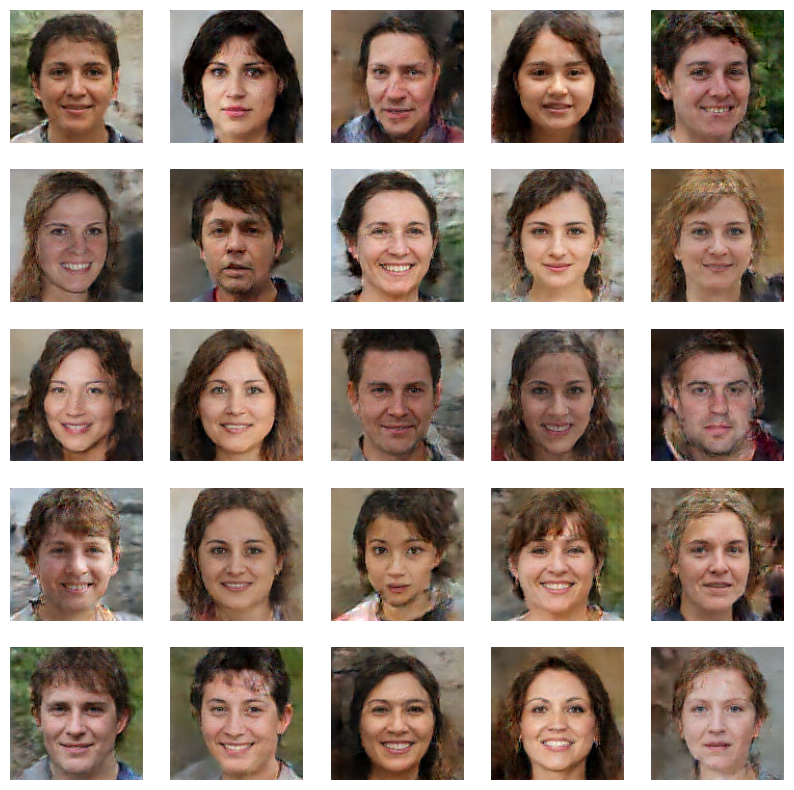

In [54]:
plot_generated_images()

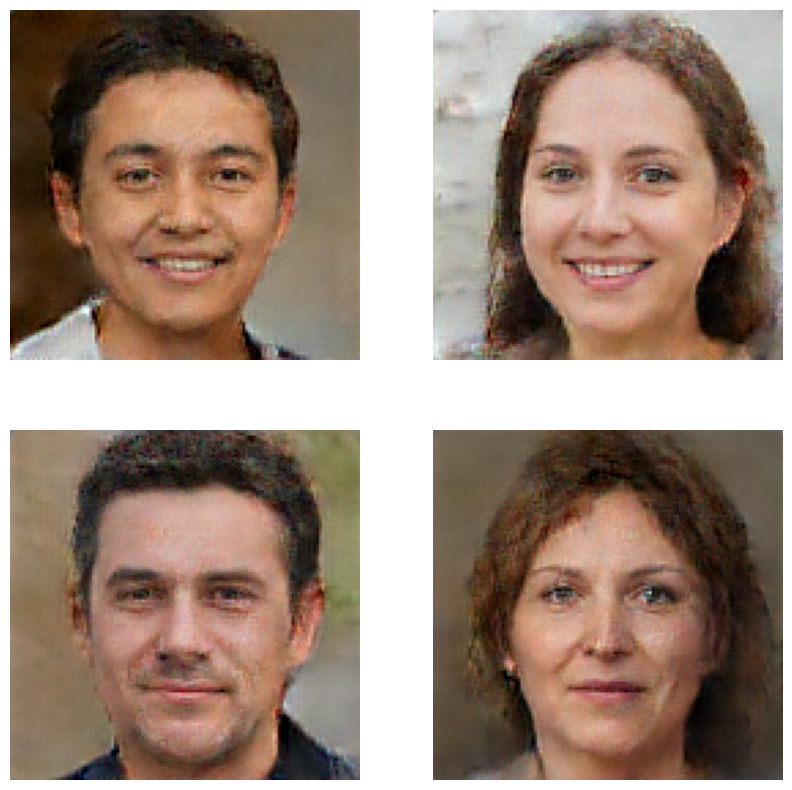

In [61]:
plot_generated_images(2)